In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data_url = "https://raw.githubusercontent.com/dthonon/pna_loup_suivi/main/data/"
# Lecture des départements
dept = pd.read_csv(
    data_url + "departements-region.csv",
    sep=",",
    header=0,
    names=[
        "Num_Département",
        "Département",
        "Région",
    ],
)
# Lecture des dommages aux animaux de rente
dommages = pd.read_csv(data_url + "dommages.csv", sep=";")
# Lecture des tirs létaux sur les loups
interventions = pd.read_csv(data_url + "protocole_intervention.csv", sep=";")
# Regroupement dans 1 dataframe
donnees_pna = pd.merge(dommages, interventions)

# Ajout des départements et régions
dommages = pd.merge(dommages, dept, on="Département")
interventions = pd.merge(interventions, dept, on="Département")
donnees_pna = pd.merge(donnees_pna, dept, on="Département")


In [4]:
# dommages_y = dommages.groupby(["Année", "Région"])
# dommages_y.sum(numeric_only=True)


In [5]:
# interventions_y = interventions.groupby(["Année"])
# interventions_y.sum(numeric_only=True)

In [4]:
donnees_pna_y = donnees_pna.groupby(["Année"])
donnees_pna_y.sum(numeric_only=True)

,Nb_dossiers,Nb_animaux_tués,AP_TDS,AP_TDR,AP_TP,AP_TPR,Loups_tués_légal,Loups_tués_illégal,Loups_tués_accident
Année,,,,,,,,,
2016,2465,9040,0.0,0.0,0.0,0.0,33.0,0.0,5.0
2017,2551,9586,0.0,0.0,0.0,0.0,34.0,1.0,1.0
2018,3061,10589,1469.0,161.0,5.0,15.0,47.0,4.0,27.0
2019,3559,11793,1609.0,210.0,12.0,2.0,94.0,5.0,20.0
2020,3517,11364,2084.0,319.0,7.0,2.0,97.0,8.0,0.0
2021,3409,10462,2188.0,231.0,0.0,0.0,100.0,6.0,0.0
2022,2476,7918,2409.0,320.0,1.0,0.0,159.0,6.0,0.0


In [5]:
# Apply the default theme
sns.set_theme()

In [7]:
dept_max = (
    "Num_Département == '06' or Num_Département == '04' or Num_Département == '05' or Num_Département == '83'"
    + "or Num_Département == '26' or Num_Département == '38' or Num_Département == '73' or Num_Département == '74'"
)
dommages_max = dommages.query(dept_max)
interventions_max = interventions.query(dept_max)
donnees_pna_max = donnees_pna.query(dept_max)


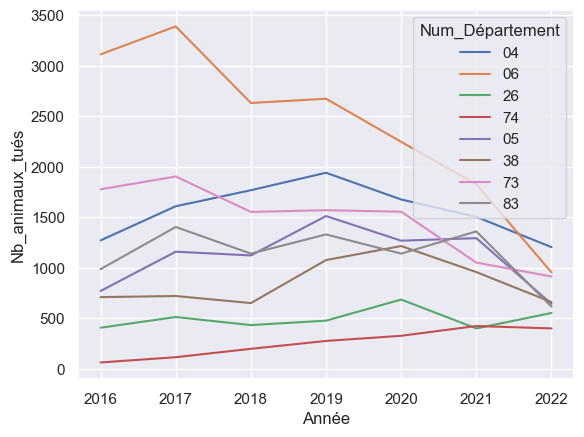

In [8]:
sns.lineplot(data=dommages_max, x="Année", y="Nb_animaux_tués", hue="Num_Département");

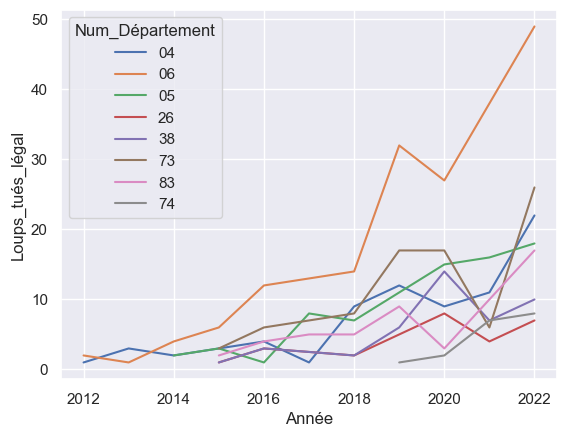

In [9]:
sns.lineplot(data=interventions_max, x="Année", y="Loups_tués_légal", hue="Num_Département");

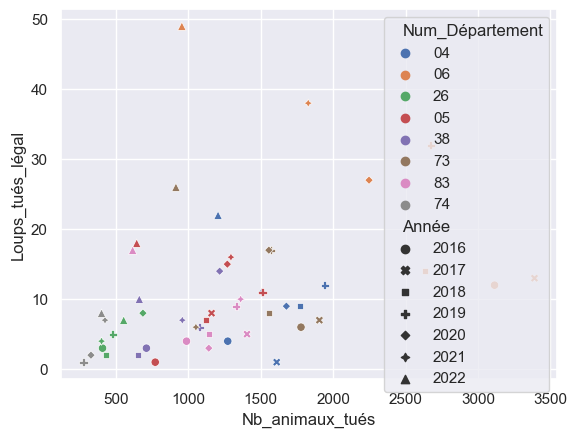

In [14]:
sns.scatterplot(
    data=donnees_pna_max,
    x="Nb_animaux_tués",
    y="Loups_tués_légal",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
